In [2]:
import pandas as pd
df = pd.read_csv('.\credit_train.csv')


Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


**Duplicates**

In [5]:
duplicates=df[df.duplicated()].shape[0]
print(duplicates)

df.drop_duplicates(inplace = True)
df.info()

10728
<class 'pandas.core.frame.DataFrame'>
Index: 89786 entries, 0 to 100000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       89785 non-null  object 
 1   Customer ID                   89785 non-null  object 
 2   Loan Status                   89785 non-null  object 
 3   Current Loan Amount           89785 non-null  float64
 4   Term                          89785 non-null  object 
 5   Credit Score                  70631 non-null  float64
 6   Annual Income                 70631 non-null  float64
 7   Years in current job          85983 non-null  object 
 8   Home Ownership                89785 non-null  object 
 9   Purpose                       89785 non-null  object 
 10  Monthly Debt                  89785 non-null  float64
 11  Years of Credit History       89785 non-null  float64
 12  Months since last delinquent  41448 non-null  float64
 13 

In [6]:
df['Current Loan Amount'] = df['Current Loan Amount'].replace(99999999.0, np.nan)

In [7]:
df[['Maximum Open Credit']] = df[['Maximum Open Credit']].replace(0, np.nan)

In [8]:
df[['Bankruptcies']] = df[['Bankruptcies']].replace(-1, np.nan)

In [9]:
df[['Tax Liens']] = df[['Tax Liens']].replace(-1, np.nan)

In [10]:
df.drop(index=100000, inplace=True)

In [11]:
df.drop(columns=['Loan ID','Customer ID'], inplace=True)

In [12]:
df.dropna(subset=['Tax Liens','Maximum Open Credit','Bankruptcies'],inplace=True)

In [13]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,NaN,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,Fully Paid,NaN,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [14]:
df['DTI'] = df['Monthly Debt']/(df['Annual Income']/12)
df.info()
# DTI is a measure of an individual's monthly debt payments relative to their monthly gross income.

<class 'pandas.core.frame.DataFrame'>
Index: 88975 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   88975 non-null  object 
 1   Current Loan Amount           77608 non-null  float64
 2   Term                          88975 non-null  object 
 3   Credit Score                  70006 non-null  float64
 4   Annual Income                 70006 non-null  float64
 5   Years in current job          85204 non-null  object 
 6   Home Ownership                88975 non-null  object 
 7   Purpose                       88975 non-null  object 
 8   Monthly Debt                  88975 non-null  float64
 9   Years of Credit History       88975 non-null  float64
 10  Months since last delinquent  40958 non-null  float64
 11  Number of Open Accounts       88975 non-null  float64
 12  Number of Credit Problems     88975 non-null  float64
 13  Curren

In [15]:
df.drop(['Monthly Debt','Annual Income'], inplace=True, axis=1)
df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,DTI
0,Fully Paid,445412.0,Short Term,709.0,8 years,Home Mortgage,Home Improvements,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0.053599
1,Fully Paid,262328.0,Short Term,NaN,10+ years,Home Mortgage,Debt Consolidation,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,NaN
2,Fully Paid,NaN,Short Term,741.0,8 years,Own Home,Debt Consolidation,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0.157000
3,Fully Paid,347666.0,Long Term,721.0,3 years,Own Home,Debt Consolidation,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0.129999
4,Fully Paid,176220.0,Short Term,NaN,5 years,Rent,Debt Consolidation,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,Fully Paid,210584.0,Short Term,719.0,1 year,Home Mortgage,Other,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0,0.057100
99996,Fully Paid,NaN,Short Term,732.0,1 year,Rent,Debt Consolidation,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,0.122000
99997,Fully Paid,103136.0,Short Term,742.0,6 years,Rent,Debt Consolidation,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,0.076300
99998,Fully Paid,530332.0,Short Term,746.0,9 years,Rent,Debt Consolidation,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0,0.069100


In [16]:
df['Credit Risk'] = df['Bankruptcies'] + df['Number of Credit Problems']+df['Tax Liens']

df.drop(['Bankruptcies','Number of Credit Problems','Tax Liens'], inplace=True, axis=1)
df
# Higher values of this composite score would indicate a higher level of credit risk.

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,DTI,Credit Risk
0,Fully Paid,445412.0,Short Term,709.0,8 years,Home Mortgage,Home Improvements,17.2,NaN,6.0,228190.0,416746.0,0.053599,2.0
1,Fully Paid,262328.0,Short Term,NaN,10+ years,Home Mortgage,Debt Consolidation,21.1,8.0,35.0,229976.0,850784.0,NaN,0.0
2,Fully Paid,NaN,Short Term,741.0,8 years,Own Home,Debt Consolidation,14.9,29.0,18.0,297996.0,750090.0,0.157000,1.0
3,Fully Paid,347666.0,Long Term,721.0,3 years,Own Home,Debt Consolidation,12.0,NaN,9.0,256329.0,386958.0,0.129999,0.0
4,Fully Paid,176220.0,Short Term,NaN,5 years,Rent,Debt Consolidation,6.1,NaN,15.0,253460.0,427174.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,Fully Paid,210584.0,Short Term,719.0,1 year,Home Mortgage,Other,17.4,18.0,6.0,456.0,259160.0,0.057100,0.0
99996,Fully Paid,NaN,Short Term,732.0,1 year,Rent,Debt Consolidation,9.4,21.0,22.0,153045.0,509234.0,0.122000,0.0
99997,Fully Paid,103136.0,Short Term,742.0,6 years,Rent,Debt Consolidation,18.8,18.0,12.0,109554.0,537548.0,0.076300,2.0
99998,Fully Paid,530332.0,Short Term,746.0,9 years,Rent,Debt Consolidation,15.0,NaN,8.0,404225.0,738254.0,0.069100,0.0


In [17]:
df.describe()

,Current Loan Amount,Credit Score,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,DTI,Credit Risk
count,77608.000000,70006.000000,88975.000000,40958.000000,88975.000000,8.897500e+04,8.897500e+04,70006.000000,88975.000000
mean,310609.276028,1131.340328,18.245636,35.092607,11.159404,2.952914e+05,7.773940e+05,0.172391,0.310604
std,184111.982992,1571.924748,7.034116,21.974037,4.985726,3.699429e+05,8.796831e+06,0.079675,0.905175
min,21450.000000,585.000000,3.600000,0.000000,1.000000,1.900000e+01,4.334000e+03,0.000000,0.000000
25%,172612.000000,708.000000,13.500000,16.000000,8.000000,1.147410e+05,2.807420e+05,0.112999,0.000000
50%,266552.000000,729.000000,17.000000,32.000000,10.000000,2.111280e+05,4.759920e+05,0.169000,0.000000
75%,431156.000000,742.000000,21.700000,51.000000,14.000000,3.691605e+05,7.938370e+05,0.227999,0.000000
max,789250.000000,7510.000000,65.000000,176.000000,76.000000,3.287897e+07,1.539738e+09,0.400000,30.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88975 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   88975 non-null  object 
 1   Current Loan Amount           77608 non-null  float64
 2   Term                          88975 non-null  object 
 3   Credit Score                  70006 non-null  float64
 4   Years in current job          85204 non-null  object 
 5   Home Ownership                88975 non-null  object 
 6   Purpose                       88975 non-null  object 
 7   Years of Credit History       88975 non-null  float64
 8   Months since last delinquent  40958 non-null  float64
 9   Number of Open Accounts       88975 non-null  float64
 10  Current Credit Balance        88975 non-null  float64
 11  Maximum Open Credit           88975 non-null  float64
 12  DTI                           70006 non-null  float64
 13  Credit

**Encoding**

In [19]:
df["Purpose"].value_counts()

Purpose
Debt Consolidation      70498
Home Improvements        5135
other                    5123
Other                    2808
Business Loan            1316
Buy a Car                1120
Medical Bills             964
Buy House                 571
Take a Trip               477
major_purchase            321
small_business            238
moving                    131
wedding                    99
vacation                   87
Educational Expenses       79
renewable_energy            8
Name: count, dtype: int64

In [20]:
# Recategorize 'Purpose' into 5 groups
def categorize_purpose(purpose):
    if purpose in ['Debt Consolidation']:
        return 'Debt Consolidation'
    elif purpose in ['Business Loan', 'small_business']:
        return 'Business Loan'
    elif purpose in ['Home Improvements', 'Buy House']:
        return 'House Loan'
    elif purpose in ['Educational Expenses', 'Buy a Car', 'Medical Bills', 'Take a Trip', 'wedding', 'vacation','moving']:
        return 'Personal Loan'
    else:
        return 'Other '

# Apply the categorization function to the 'Purpose' column
df['Purpose'] = df['Purpose'].apply(categorize_purpose)

In [21]:
df["Years in current job"].value_counts()

Years in current job
10+ years    27576
2 years       8163
3 years       7267
< 1 year      7247
5 years       6084
1 year        5755
4 years       5450
6 years       5095
7 years       4956
8 years       4089
9 years       3522
Name: count, dtype: int64

In [22]:
# Recategorize into 4 levels
def categorize_years(years):
    if isinstance(years, str) and '10+ years' in years:
        return '10+ years'
    elif isinstance(years, str) and years in ['9 years', '8 years', '7 years']:
        return '7-9 years'
    elif isinstance(years, str) and years in ['6 years', '5 years', '4 years','3 years']:
        return '3-6 years'
    elif isinstance(years, str):
        return '< 3 years'
    else:
        return 'Missing or Invalid'

# Apply the categorization function to the 'Years in current job' column
df['Years in current job'] = df['Years in current job'].apply(categorize_years)

In [23]:
#convert "Loan Status" into numerical values
df["Loan Status"] = df["Loan Status"].astype('category')
df["Loan Status"] = df["Loan Status"].cat.codes

#convert "Term" into numerical values
df["Term"] = df["Term"].astype('category')
df["Term"] = df["Term"].cat.codes

#convert "Home Ownership	" into numerical values
df["Home Ownership"] = df["Home Ownership"].astype('category')
df["Home Ownership"] = df["Home Ownership"].cat.codes

#convert "Purpose" into numerical values
df["Purpose"] = df["Purpose"].astype('category')
df["Purpose"] = df["Purpose"].cat.codes

#convert "Years in current job" into numerical values
df["Years in current job"] = df["Years in current job"].astype('category')
df["Years in current job"] = df["Years in current job"].cat.codes


In [24]:
df['Loan Status'].value_counts()

Loan Status
1    66525
0    22450
Name: count, dtype: int64

In [25]:
round(df['Loan Status'].value_counts()[0]/len(df) * 100,2)
round(df['Loan Status'].value_counts()[1]/len(df) * 100,2)

74.77

In [26]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd

print('Fully Paid', round(df['Loan Status'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Defaulted', round(df['Loan Status'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

X = df.drop('Loan Status', axis=1)
y = df['Loan Status']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Reset index for both X and y after splitting
original_Xtrain.reset_index(drop=True, inplace=True)
original_Xtest.reset_index(drop=True, inplace=True)
original_ytrain.reset_index(drop=True, inplace=True)
original_ytest.reset_index(drop=True, inplace=True)

Fully Paid 74.77 % of the dataset
Defaulted 25.23 % of the dataset


In [27]:
print('Fully Paid', round(original_ytrain.value_counts()[1]/len(original_ytrain) * 100, 2), '% of the dataset')
print('Fully Paid', round(original_ytrain.value_counts()[0]/len(original_ytrain) * 100, 2), '% of the dataset')

Fully Paid 74.77 % of the dataset
Fully Paid 25.23 % of the dataset


In [28]:
original_Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71180 entries, 0 to 71179
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           62375 non-null  float64
 1   Term                          71180 non-null  int8   
 2   Credit Score                  56333 non-null  float64
 3   Years in current job          71180 non-null  int8   
 4   Home Ownership                71180 non-null  int8   
 5   Purpose                       71180 non-null  int8   
 6   Years of Credit History       71180 non-null  float64
 7   Months since last delinquent  32850 non-null  float64
 8   Number of Open Accounts       71180 non-null  float64
 9   Current Credit Balance        71180 non-null  float64
 10  Maximum Open Credit           71180 non-null  float64
 11  DTI                           56333 non-null  float64
 12  Credit Risk                   71180 non-null  float64
dtypes

In [29]:
original_Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17795 entries, 0 to 17794
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           15233 non-null  float64
 1   Term                          17795 non-null  int8   
 2   Credit Score                  13673 non-null  float64
 3   Years in current job          17795 non-null  int8   
 4   Home Ownership                17795 non-null  int8   
 5   Purpose                       17795 non-null  int8   
 6   Years of Credit History       17795 non-null  float64
 7   Months since last delinquent  8108 non-null   float64
 8   Number of Open Accounts       17795 non-null  float64
 9   Current Credit Balance        17795 non-null  float64
 10  Maximum Open Credit           17795 non-null  float64
 11  DTI                           13673 non-null  float64
 12  Credit Risk                   17795 non-null  float64
dtypes

In [30]:
x_train=original_Xtrain.copy()
x_test=original_Xtest.copy()
y_train=original_ytrain.copy()
y_test=original_ytest.copy()

**Missing Values**

In [31]:
percentage_missing = (x_train.isnull().sum() / len(x_train)) * 100
print(percentage_missing)

Current Loan Amount             12.370048
Term                             0.000000
Credit Score                    20.858387
Years in current job             0.000000
Home Ownership                   0.000000
Purpose                          0.000000
Years of Credit History          0.000000
Months since last delinquent    53.849396
Number of Open Accounts          0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
DTI                             20.858387
Credit Risk                      0.000000
dtype: float64


In [32]:
percentage_missing = (x_test.isnull().sum() / len(x_test)) * 100
print(percentage_missing)

Current Loan Amount             14.397303
Term                             0.000000
Credit Score                    23.163810
Years in current job             0.000000
Home Ownership                   0.000000
Purpose                          0.000000
Years of Credit History          0.000000
Months since last delinquent    54.436640
Number of Open Accounts          0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
DTI                             23.163810
Credit Risk                      0.000000
dtype: float64


In [33]:
a=x_train['Credit Score'].median()
x_train['Credit Score'].fillna(a, inplace=True)
x_test['Credit Score'].fillna(a, inplace=True)

d=x_train['DTI'].median()
x_train['DTI'].fillna(d, inplace=True)
x_test['DTI'].fillna(d, inplace=True)


c=x_train['Current Loan Amount'].median()
x_train['Current Loan Amount'].fillna(c, inplace=True)
x_test['Current Loan Amount'].fillna(c, inplace=True)

In [34]:
percentage_missing = (x_test.isnull().sum() / len(x_test)) * 100
print(percentage_missing)

Current Loan Amount              0.00000
Term                             0.00000
Credit Score                     0.00000
Years in current job             0.00000
Home Ownership                   0.00000
Purpose                          0.00000
Years of Credit History          0.00000
Months since last delinquent    54.43664
Number of Open Accounts          0.00000
Current Credit Balance           0.00000
Maximum Open Credit              0.00000
DTI                              0.00000
Credit Risk                      0.00000
dtype: float64


df_dropped(without Months since last delinquent)

In [35]:
x_train_dropped = x_train.drop(columns=['Months since last delinquent'], axis=1)
x_test_dropped = x_test.drop(columns=['Months since last delinquent'], axis=1)

In [36]:
(x_train_dropped.isnull().sum() / len(x_train)) * 100

Current Loan Amount        0.0
Term                       0.0
Credit Score               0.0
Years in current job       0.0
Home Ownership             0.0
Purpose                    0.0
Years of Credit History    0.0
Number of Open Accounts    0.0
Current Credit Balance     0.0
Maximum Open Credit        0.0
DTI                        0.0
Credit Risk                0.0
dtype: float64

In [37]:
(x_test_dropped.isnull().sum() / len(x_test)) * 100

Current Loan Amount        0.0
Term                       0.0
Credit Score               0.0
Years in current job       0.0
Home Ownership             0.0
Purpose                    0.0
Years of Credit History    0.0
Number of Open Accounts    0.0
Current Credit Balance     0.0
Maximum Open Credit        0.0
DTI                        0.0
Credit Risk                0.0
dtype: float64

In [38]:
x_train=x_train_dropped
x_test=x_test_dropped

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71180 entries, 0 to 71179
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Current Loan Amount      71180 non-null  float64
 1   Term                     71180 non-null  int8   
 2   Credit Score             71180 non-null  float64
 3   Years in current job     71180 non-null  int8   
 4   Home Ownership           71180 non-null  int8   
 5   Purpose                  71180 non-null  int8   
 6   Years of Credit History  71180 non-null  float64
 7   Number of Open Accounts  71180 non-null  float64
 8   Current Credit Balance   71180 non-null  float64
 9   Maximum Open Credit      71180 non-null  float64
 10  DTI                      71180 non-null  float64
 11  Credit Risk              71180 non-null  float64
dtypes: float64(8), int8(4)
memory usage: 4.6 MB


**Standardize**

In [40]:
columns = x_train.columns.tolist()
columns

['Current Loan Amount',
 'Term',
 'Credit Score',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Years of Credit History',
 'Number of Open Accounts',
 'Current Credit Balance',
 'Maximum Open Credit',
 'DTI',
 'Credit Risk']

In [41]:
Numerical_cols=['Current Loan Amount','Credit Score','Years of Credit History','Number of Open Accounts',
                                  'Current Credit Balance','Maximum Open Credit','DTI','Credit Risk']
Categorical_cols=['Term','Years in current job','Home Ownership','Purpose']

In [42]:
# from sklearn.preprocessing import StandardScaler

# # Standardize numerical features
# scaler = StandardScaler()
# x_train[Numerical_cols] = scaler.fit_transform(x_train[Numerical_cols])


In [43]:
x_train

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,DTI,Credit Risk
0,445412.0,1,709.0,2,1,2,17.2,6.0,228190.0,416746.0,0.053599,2.0
1,262328.0,1,727.0,0,1,1,21.1,35.0,229976.0,850784.0,0.169000,0.0
2,266926.0,1,741.0,2,2,1,14.9,18.0,297996.0,750090.0,0.157000,1.0
3,347666.0,0,721.0,1,2,1,12.0,9.0,256329.0,386958.0,0.129999,0.0
4,176220.0,1,727.0,1,3,1,6.1,15.0,253460.0,427174.0,0.169000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71175,112332.0,1,746.0,2,1,1,21.5,19.0,848483.0,1760660.0,0.168900,0.0
71176,572396.0,0,677.0,1,1,1,16.9,17.0,281314.0,558734.0,0.273000,0.0
71177,107316.0,1,717.0,2,3,1,34.0,8.0,7790.0,56364.0,0.047100,4.0
71178,215644.0,1,727.0,3,3,3,17.2,6.0,60819.0,281666.0,0.169000,0.0


In [44]:
# from google.colab import files
# x_train_dropped.to_csv('x_train_dropped.csv', index=False)
# files.download('x_train_dropped.csv')

# x_test_dropped.to_csv('x_test_dropped.csv', index=False)
# files.download('x_test_dropped.csv')

# y_train.to_csv('y_train.csv', index=False)
# files.download('y_train.csv')

# y_test.to_csv('y_test.csv', index=False)
# files.download('y_test.csv')



**Advanced Analysis**

In [45]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import binarize, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

**1) Logistice Regression**

In [48]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [ ]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Make prediction for the test data
y_pred1= modelLogistic.predict(x_test)

In [ ]:
# evaluate accuracy of train data
modelLogistic.score(x_train, y_train)

0.7822983984265243

In [ ]:
# evaluate accuracy of test data
modelLogistic.score(x_test, y_test)

0.7862882832256252

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))

Recall: 0.9769259676813228
Precision: 0.7880441372620347


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.20      0.33      6786
           1       0.79      0.99      0.88     19929

    accuracy                           0.79     26715
   macro avg       0.85      0.60      0.60     26715
weighted avg       0.82      0.79      0.74     26715



In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred1)
print(ConfusionMatrix)

[[  994  3496]
 [  307 12998]]


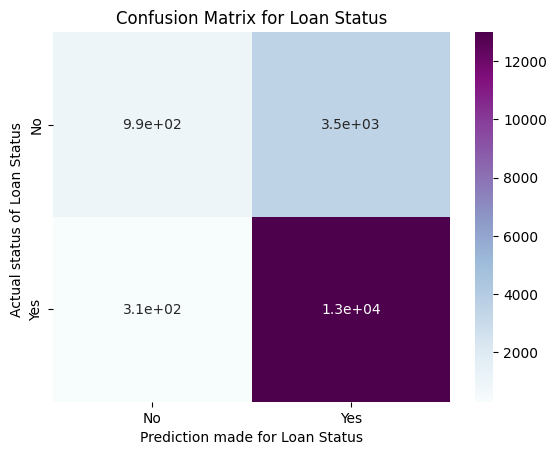

In [ ]:
ax = sns.heatmap(ConfusionMatrix , annot=True, cmap='BuPu')  #BuPu=colour
ax.set_title('Confusion Matrix for Loan Status');
ax.set_xlabel('Prediction made for Loan Status')
ax.set_ylabel('Actual status of Loan Status ');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
## Display the visualization of the Confusion Matrix.
plt.show()

# Confusion matrix : True negative   False negative
#                    False positive, True positive

Parameter tunning - logistic reg

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],    # l1=Lasso, l2=ridge
    'C': [ 0.001,0.01,0.1, 1, 10,20],          # inverse of regularization strength. Smaller values specify stronger regularization
    'max_iter': [50,100,150]            # maximum number of iterations taken for the solver to converge
    #'solver': ['liblinear', 'saga']          # used to optimize the logistic regression function
}
grid_search = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.001, 'max_iter': 50, 'penalty': 'l2'}


**through hyper-parameter tuning, it gives Ridge as optimal**

In [ ]:
best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Accuracy: 0.7862882832256252
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.22      0.34      4490
           1       0.79      0.98      0.87     13305

    accuracy                           0.79     17795
   macro avg       0.78      0.60      0.61     17795
weighted avg       0.78      0.79      0.74     17795



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))


Recall: 0.9769259676813228
Precision: 0.7880441372620347


In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred1)
print(ConfusionMatrix)

[[  994  3496]
 [  307 12998]]


There is no any improvement through prameter tuning

**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3, max_features=4)

In [ ]:
#Make prediction for the test data
y_pred2= dt.predict(x_test)

In [ ]:
# evaluate accuracy of train data
print (dt.score(x_train , y_train))
# evaluate accuracy of test data
print (dt.score(x_test , y_test))

0.7664933970216353
0.7683057038493959


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

Recall: 1.0
Precision: 0.7634266697268763


[Text(0.4583333333333333, 0.875, 'x[1] <= 0.5\ngini = 0.377\nsamples = 71180\nvalue = [17960, 53220]'),
 Text(0.25, 0.625, 'x[2] <= 3299.0\ngini = 0.454\nsamples = 19284\nvalue = [6704, 12580]'),
 Text(0.16666666666666666, 0.375, 'x[4] <= 2.5\ngini = 0.419\nsamples = 17945\nvalue = [5365, 12580]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.395\nsamples = 11965\nvalue = [3245, 8720]'),
 Text(0.25, 0.125, 'gini = 0.458\nsamples = 5980\nvalue = [2120, 3860]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1339\nvalue = [1339, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 263285.0\ngini = 0.34\nsamples = 51896\nvalue = [11256, 40640]'),
 Text(0.5, 0.375, 'x[10] <= 0.148\ngini = 0.381\nsamples = 27382\nvalue = [6999, 20383]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.329\nsamples = 8895\nvalue = [1844, 7051]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.402\nsamples = 18487\nvalue = [5155, 13332]'),
 Text(0.8333333333333334, 0.375, 'x[10] <= 0.169\ngini = 0.287\nsamples = 24

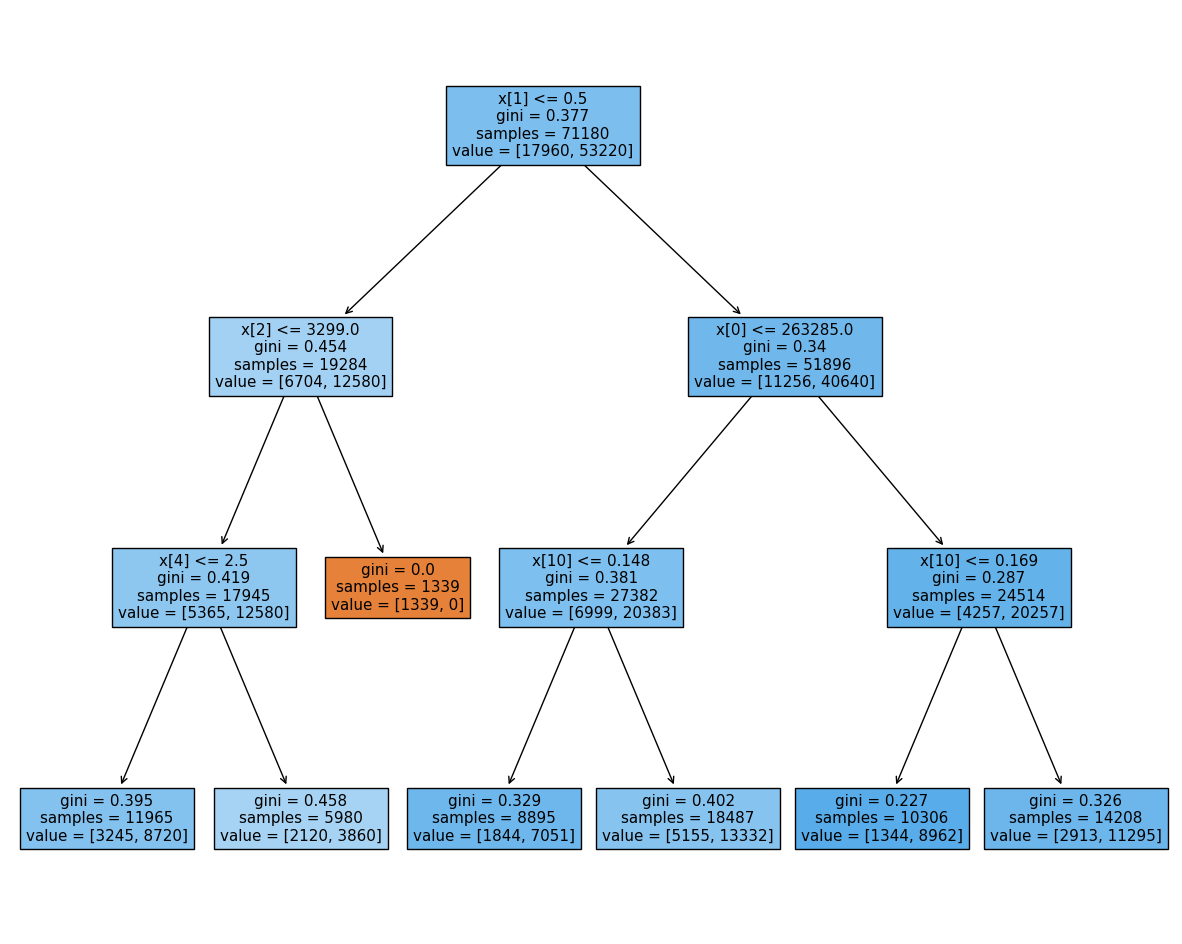

In [ ]:
from sklearn import tree
fig = plt.figure(figsize= (15,12))
tree.plot_tree(dt , filled=True)

In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred2)
print(ConfusionMatrix)

[[  367  4123]
 [    0 13305]]


**3) Random forest classifier**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="gini",
                             max_depth=8,
                             min_samples_split=10,
                             random_state=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
y_pred3 = rf.predict(x_test)
y_pred3

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred3)
print(ConfusionMatrix)

[[  925  3565]
 [    0 13305]]


In [ ]:
# overall accuracy of the model
accuracy_score(y_test,y_pred3)

0.7996628266366957

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

Recall: 1.0
Precision: 0.7886781268524007


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33      1358
           1       1.00      0.79      0.88     25357

    accuracy                           0.80     26715
   macro avg       0.60      0.89      0.61     26715
weighted avg       0.96      0.80      0.85     26715



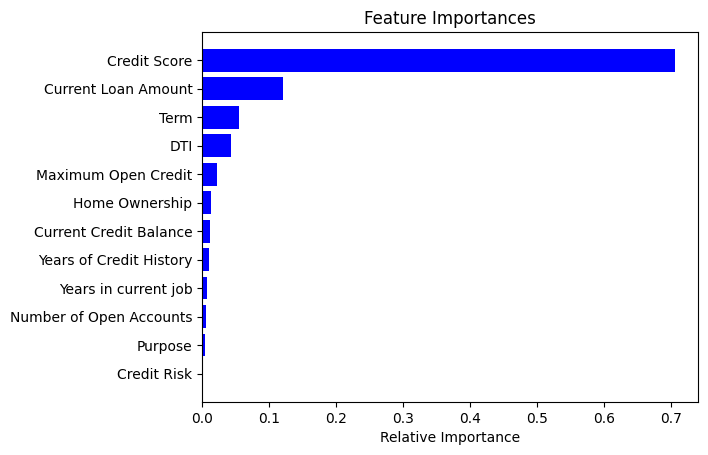

In [ ]:
# feature importance
features = x_train.columns
importances=rf.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color="b",align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances

array([0.12131994, 0.05519976, 0.70553652, 0.007184  , 0.01313191,
       0.00473222, 0.00946094, 0.00535597, 0.01157485, 0.02185262,
       0.04277243, 0.00187885])

In [ ]:
x_trainNew = x_train.drop(['Credit Risk','Purpose','Number of Open Accounts','Years of Credit History','Years in current job'],axis=1)
x_trainNew

,Current Loan Amount,Term,Credit Score,Home Ownership,Current Credit Balance,Maximum Open Credit,DTI
0,445412.0,1,709.0,1,228190.0,416746.0,0.053599
1,262328.0,1,727.0,1,229976.0,850784.0,0.169000
2,266926.0,1,741.0,2,297996.0,750090.0,0.157000
3,347666.0,0,721.0,2,256329.0,386958.0,0.129999
4,176220.0,1,727.0,3,253460.0,427174.0,0.169000
...,...,...,...,...,...,...,...
71175,112332.0,1,746.0,1,848483.0,1760660.0,0.168900
71176,572396.0,0,677.0,1,281314.0,558734.0,0.273000
71177,107316.0,1,717.0,3,7790.0,56364.0,0.047100
71178,215644.0,1,727.0,3,60819.0,281666.0,0.169000


In [ ]:
x_testNew = x_test.drop(['Credit Risk','Purpose','Number of Open Accounts','Years of Credit History','Years in current job'],axis=1)
x_testNew

,Current Loan Amount,Term,Credit Score,Home Ownership,Current Credit Balance,Maximum Open Credit,DTI
0,238106.0,1,727.0,3,208278.0,319836.0,0.169000
1,266926.0,1,722.0,1,628311.0,776424.0,0.270000
2,324588.0,1,727.0,1,42484.0,143000.0,0.123001
3,262856.0,1,748.0,1,61560.0,186098.0,0.114999
4,266926.0,1,731.0,3,479807.0,1050214.0,0.329003
...,...,...,...,...,...,...,...
17790,210584.0,1,719.0,1,456.0,259160.0,0.057100
17791,266926.0,1,732.0,3,153045.0,509234.0,0.122000
17792,103136.0,1,742.0,3,109554.0,537548.0,0.076300
17793,530332.0,1,746.0,3,404225.0,738254.0,0.069100


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(criterion="gini",
                             max_depth=8,
                             min_samples_split=10,
                             random_state=5)
rf1.fit(x_trainNew, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
y_pred31 = rf1.predict(x_testNew)
y_pred31

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred31)
print(ConfusionMatrix)

[[  927  3563]
 [    6 13299]]


In [ ]:
# overall accuracy of the model
accuracy_score(y_test,y_pred31)

0.7994380443944928

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred31))
print("Precision:", precision_score(y_test, y_pred31))

Recall: 0.9995490417136415
Precision: 0.7886964772862056


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred31,y_test))

              precision    recall  f1-score   support

           0       0.21      0.99      0.34       933
           1       1.00      0.79      0.88     16862

    accuracy                           0.80     17795
   macro avg       0.60      0.89      0.61     17795
weighted avg       0.96      0.80      0.85     17795



In [ ]:
rf = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_features='sqrt',
                            n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
y_pred3 = rf.predict(x_test)
y_pred3

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred3)
print(ConfusionMatrix)

[[ 1156  3334]
 [  273 13032]]


In [ ]:
# overall accuracy of the model
accuracy_score(y_test,y_pred3)

0.7973026130935656

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

Recall: 0.9794813979706877
Precision: 0.7962849810582916


Parameter-tuning

In [ ]:
param_grid = {
    'n_estimators': [75,150,200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'min_samples_split':[2,5,8],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

KeyboardInterrupt: 

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features="log2",
                                    max_leaf_nodes=6,
                                    min_samples_split=8,
                                    n_estimators=200)
model_grid.fit(x_train, y_train)
y_pred_grid = model.predict(x_test)
print(classification_report(y_pred_grid, y_test))

In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred_grid)
print(ConfusionMatrix)

**4) Naive Bayes**

To apply naive bayes, variables should be independent and all the quantitative variables should be convert to categorical variables if they are skewed; to do this we need to consider the describution by considering descriptive analysis

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred4 = nb.predict(x_test)
print(classification_report(y_pred4, y_test))

              precision    recall  f1-score   support

           0       0.21      0.98      0.34       942
           1       1.00      0.79      0.88     16853

    accuracy                           0.80     17795
   macro avg       0.60      0.88      0.61     17795
weighted avg       0.96      0.80      0.85     17795



In [ ]:
# evaluate accuracy of test data
nb.score(x_test, y_test)

0.798595110986232

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred4))
print("Precision:", precision_score(y_test, y_pred4))

Recall: 0.9986471251409245
Precision: 0.7884056251112561


parameter tuning- naive bayes

In [ ]:
param_grid = {'var_smoothing': [1e-15, 1e-8, 1e-7]}
nb_classifier = GaussianNB()
# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

{'var_smoothing': 1e-15}


In [ ]:
# Refit the classifier on the entire training data
optimal_nb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimal_nb_classifier.fit(x_train, y_train)
y_pred4 = optimal_nb_classifier.predict(x_test)
print(classification_report(y_pred4, y_test))

              precision    recall  f1-score   support

           0       0.25      0.81      0.38      1363
           1       0.98      0.79      0.88     16432

    accuracy                           0.80     17795
   macro avg       0.61      0.80      0.63     17795
weighted avg       0.92      0.80      0.84     17795



In [ ]:
# evaluate accuracy of test data
optimal_nb_classifier.score(x_test, y_test)

0.7953919640348412

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred4))
print("Precision:", precision_score(y_test, y_pred4))

Recall: 0.980683953400977
Precision: 0.7940603700097371


In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred4)
print(ConfusionMatrix)

[[ 1106  3384]
 [  257 13048]]


**XGBoost** **Classifier**

In [49]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=21)
xgb_model.fit(x_train,y_train)
y_pred5=xgb_model.predict(x_test)
print(classification_report(y_pred5, y_test))

              precision    recall  f1-score   support

           0       0.26      0.79      0.40      1501
           1       0.98      0.80      0.88     16294

    accuracy                           0.80     17795
   macro avg       0.62      0.79      0.64     17795
weighted avg       0.92      0.80      0.84     17795



In [50]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred5))
print("Precision:", precision_score(y_test, y_pred5))

Recall: 0.9763246899661782
Precision: 0.7972259727507058


In [51]:
# evaluate accuracy of test data
xgb_model.score(x_test, y_test)

0.796628266366957

In [52]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred5)
print(ConfusionMatrix)

[[ 1186  3304]
 [  315 12990]]


para-tuning

In [53]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}
xgb_model = xgb.XGBClassifier()
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
xgb_optimal=random_search.fit(x_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.045713589671951334, 'max_depth': 5, 'n_estimators': 166, 'subsample': 0.9044208180951521}
Best score:  0.7986232087665075


In [57]:
y_pred5_optimal=xgb_optimal.predict(x_test)
print(classification_report(y_pred5_optimal, y_test))

              precision    recall  f1-score   support

           0       0.22      0.92      0.35      1069
           1       0.99      0.79      0.88     16726

    accuracy                           0.80     17795
   macro avg       0.61      0.85      0.62     17795
weighted avg       0.95      0.80      0.85     17795



In [54]:
# evaluate accuracy of test data
xgb_optimal.score(x_test, y_test)

0.79763978645687

In [55]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred5))
print("Precision:", precision_score(y_test, y_pred5))

Recall: 0.9763246899661782
Precision: 0.7972259727507058


In [58]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred5_optimal)
print(ConfusionMatrix)

[[  979  3511]
 [   90 13215]]


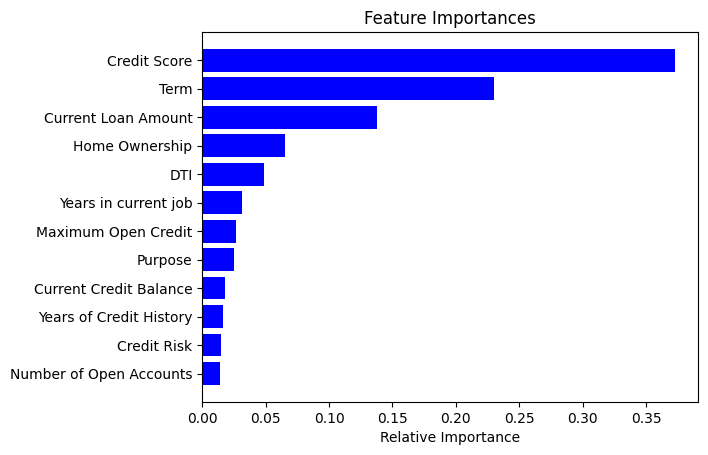

In [59]:
# feature importance
features = x_train.columns
importances=xgb_optimal.best_estimator_.feature_importances_
indices=np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color="b",align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances

array([0.11607796, 0.2509525 , 0.32952866, 0.03419833, 0.05735849,
       0.03104718, 0.02488151, 0.02413857, 0.02575595, 0.03282868,
       0.04511536, 0.02811677], dtype=float32)

In [60]:
x_testNew = x_test.drop(['Credit Risk','Purpose','Number of Open Accounts','Years of Credit History','Current Credit Balance'],axis=1)
x_trainNew = x_train.drop(['Credit Risk','Purpose','Number of Open Accounts','Years of Credit History','Current Credit Balance'],axis=1)


In [61]:
xgb_optimal1=random_search.fit(x_trainNew, y_train)
print("Best score: ", random_search.best_score_)

y_pred5_optimal1=xgb_optimal1.predict(x_testNew)

print("Recall:", recall_score(y_test, y_pred5_optimal1))
print("Precision:", precision_score(y_test, y_pred5_optimal1))

Best score:  0.7984827198651306
Recall: 0.9969184517098835
Precision: 0.7888664208397764


6) **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred6 = knn.predict(x_test)
print(classification_report(y_pred6, y_test))

              precision    recall  f1-score   support

           0       0.15      0.36      0.21      1909
           1       0.91      0.76      0.83     15886

    accuracy                           0.72     17795
   macro avg       0.53      0.56      0.52     17795
weighted avg       0.83      0.72      0.76     17795



In [ ]:
# evaluate accuracy of test data
knn.score(x_test, y_test)

0.7166057881427367

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred6))
print("Precision:", precision_score(y_test, y_pred6))

Recall: 0.907478391582112
Precision: 0.760040287045197


In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred6)
print(ConfusionMatrix)

[[  678  3812]
 [ 1231 12074]]


parameter tuning-Knn

In [ ]:
param_grid = {
    'n_neighbors': range(1, 31),  # Try different values of k from 1 to 30
    'weights': ['uniform', 'distance'],  # Try different weightings for neighbors
    'metric': ['euclidean', 'manhattan']  # Try different distance metrics
}
# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='precision')
grid_search.fit(x_train, y_train)
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}


In [ ]:
# Get the best model
best_knn_model = grid_search.best_estimator_

knn_optimal = best_knn_model.fit(x_train, y_train)

y_pred6_optimal=knn_optimal.predict(x_test)
print(classification_report(y_pred6_optimal, y_test))

              precision    recall  f1-score   support

           0       0.47      0.32      0.38      6513
           1       0.67      0.79      0.72     11282

    accuracy                           0.62     17795
   macro avg       0.57      0.56      0.55     17795
weighted avg       0.60      0.62      0.60     17795



In [ ]:
dfghbsxcd

In [ ]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred6_optimal)
print(ConfusionMatrix)

[[2116 2374]
 [4397 8908]]


In [ ]:
y_pred6_optimal=knn_optimal.predict(x_test)
print(classification_report(y_pred6_optimal, y_test))

              precision    recall  f1-score   support

           0       0.47      0.32      0.38      6513
           1       0.67      0.79      0.72     11282

    accuracy                           0.62     17795
   macro avg       0.57      0.56      0.55     17795
weighted avg       0.60      0.62      0.60     17795



In [ ]:
# evaluate accuracy of test data
knn_optimal.score(x_test, y_test)

0.6194998595110986

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
print("Recall:", recall_score(y_test, y_pred6_optimal))
print("Precision:", precision_score(y_test, y_pred6_optimal))

Recall: 0.6695227358136039
Precision: 0.789576316255983


**Model evaluation-ROC/AUC curve**

in here ROC curves are generated for original data, not for ptuned-resullts

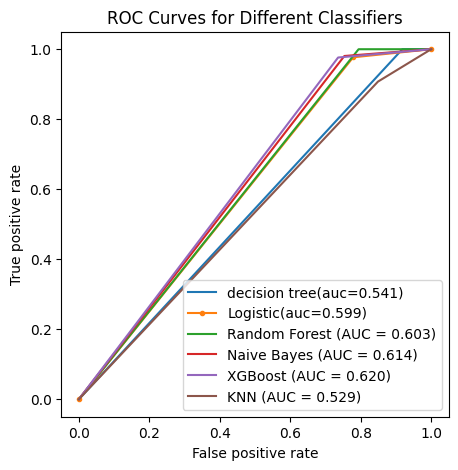

In [ ]:
# ROC-AUC curve
from sklearn.metrics import roc_curve, auc

# Logistic reg
logistic_fpr, logistic_tpr, threshold=roc_curve(y_test,y_pred1)
auc_logistic = auc(logistic_fpr,logistic_tpr)

# Decision Tree
dt_fpr,dt_tpr,threshold=roc_curve(y_test,y_pred2)
auc_dt = auc(dt_fpr,dt_tpr)

# Random Forest Classifier
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred3)
auc_rf = auc(rf_fpr, rf_tpr)

# Naive Bayes
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred4)
auc_nb = auc(nb_fpr, nb_tpr)

# XGBoost Classifier
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred5)
auc_xgb = auc(xgb_fpr, xgb_tpr)

# KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred6)
auc_knn = auc(knn_fpr, knn_tpr)


plt.figure(figsize=(5,5),dpi=100)
plt.plot(dt_fpr,dt_tpr,linestyle="-",label='decision tree(auc=%0.3f)' % auc_dt)
plt.plot(logistic_fpr,logistic_tpr,marker=".",label='Logistic(auc=%0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, linestyle="-", label='Random Forest (AUC = %0.3f)' % auc_rf)
plt.plot(nb_fpr, nb_tpr, linestyle="-", label='Naive Bayes (AUC = %0.3f)' % auc_nb)
plt.plot(xgb_fpr, xgb_tpr, linestyle="-", label='XGBoost (AUC = %0.3f)' % auc_xgb)
plt.plot(knn_fpr, knn_tpr, linestyle="-", label='KNN (AUC = %0.3f)' % auc_knn)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.show()

**Download file**

In [66]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# now you can save it to a file
file = './ML_Model.pkl'
with open(file, 'wb') as f:
    pickle.dump(xgb_optimal1, f)

FileNotFoundError: [Errno 2] No such file or directory: './Project 3/ML_Model.pkl'

In [64]:
with open(file, 'rb') as f:
    k = pickle.load(f)